<a href="https://colab.research.google.com/github/Venkata-Sai-Prakash-Yerramsetti/CMPE257-Fall23-Venkata-Sai-Prakash-Yerramsetti/blob/homework-4/HW4_CMPE_257.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")

In [307]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [308]:
def proper_df(input_data):
  data = []
  N, M = input_data.shape
  for i in range(N):
    string = input_data.iloc[i]
    list_at_itrable_value = [float(x) for x in string[0].split()]
    data.append(list_at_itrable_value)
  df = pd.DataFrame(data, columns = get_lables())
  return df


def get_lables():
  column_names = ['label']
  column_names.extend([str(x) for x in range(256)])
  return column_names


def calculate_intensity(df):
    pixel_values = df.iloc[:, 1:].values

    mean_absolute_intensity = np.mean(np.abs(pixel_values), axis=1)

    # df['Mean_Absolute_Intensity'] = mean_absolute_intensity

    # intensity_column = df.iloc[:, 1:].mean(axis=1)
    df['x1'] = mean_absolute_intensity
    return df

def calculate_symmetry(df):
    pixel_values = df.iloc[:, 1:].values
    n = pixel_values.shape[1]
    cms_symmetry = np.sum(np.abs(pixel_values - np.flip(pixel_values, axis=1)), axis=1) / n
    df['x2'] = cms_symmetry
    return df

def get_preprocessed_digits_dataframe(file_path):
  digit_train_data = pd.read_csv(file_path)
  digit_train_df = proper_df(digit_train_data)
  digit_train_df['label'] = digit_train_df['label'].apply(lambda x: -1.0 if x != 1.0 else x)
  return digit_train_df

def processor(file_path):
  binary_filtered_digit_train_df = get_preprocessed_digits_dataframe(file_path)
  binary_filtered_digit_train_df = binary_filtered_digit_train_df.rename(columns={'label': 'y'})
  binary_filtered_digit_train_df = calculate_intensity(binary_filtered_digit_train_df)
  binary_filtered_digit_train_df = calculate_symmetry(binary_filtered_digit_train_df)
  train_df = binary_filtered_digit_train_df[['x1', 'x2', 'y']]
  positive_train_df = train_df[train_df['y'] == 1.0]
  negative_train_df = train_df[train_df['y'] == -1.0]
  return train_df


# Homework-4

Note:
-  SVM's linear and rbf kernel doesn't accept degree parameter
-  SVM's poly kernal accepts the degree parameter and its default value is 3. Hence, there is no need to pass this information third degree polynomial explicitely to SVM.

In [309]:
class saradha:
  def __init__(self):
    self.kernels = ['linear', 'poly', 'rbf']
    self.C = [0.01, 0.1, 1, 10, 100, 1000]
    self.cv_size = 5

  def __init__(self, train_df=None, test_df=None):
    self.kernels = ['linear', 'poly', 'rbf']
    self.C = [0.01, 0.1, 1, 10, 100, 1000]
    self.cv_size = 5

    if train_df is not None:
      self.X_train = train_df[['x1', 'x2']]
      self.Y_train = train_df[['y']]

    if test_df is not None:
      self.X_test = test_df[['x1', 'x2']]
      self.Y_test = test_df[['y']]

train_df = processor('/content/drive/MyDrive/datasets/ZipDigits.train')
test_df = processor('/content/drive/MyDrive/datasets/ZipDigits.test')
assignment_chedham = saradha(train_df, test_df)

## Task-1

In [310]:
class first_one(saradha):
  def __init__(self, df):
    super().__init__()
    self.df = df
    self.X = df[['x1', 'x2']]
    self.Y = df[['y']]
    self.error = []

  def first_low_pass(self, C=1):
    for index, kernel in enumerate(self.kernels):
      errors_from_the_kernel = []
      for C in self.C:
        support_vector = SVC(kernel=kernel, C=C)
        X_train = self.df[['x1', 'x2']]
        y_train = self.df[['y']]
        support_vector.fit(X_train, y_train)
        preicted_y = support_vector.predict(X_train)
        error_from_training = 1 - accuracy_score(y_train, preicted_y)
        errors_from_the_kernel.append(error_from_training)

      self.error.append(errors_from_the_kernel)
    c_1_index = self.C.index(1)
    for index, kernel in enumerate(self.kernels):
      print(f"Training error {kernel} kernel and C={1}: {self.error[index][c_1_index]:.4f}")


complete_first_task = first_one(train_df)

### LP-1

In [311]:
complete_first_task.first_low_pass()

Training error linear kernel and C=1: 0.0240
Training error poly kernel and C=1: 0.0121
Training error rbf kernel and C=1: 0.0137


In [312]:
complete_first_task.error

[[0.13786008230452673,
  0.03827160493827164,
  0.02400548696844995,
  0.013854595336076803,
  0.012071330589849105,
  0.011522633744855959],
 [0.01275720164609051,
  0.012071330589849105,
  0.012071330589849105,
  0.012345679012345734,
  0.012208504801097364,
  0.012208504801097364],
 [0.03566529492455417,
  0.020850480109739333,
  0.013717421124828544,
  0.011659807956104218,
  0.0113854595336077,
  0.011659807956104218]]

HP-1

What is the best kernel for this dataset only based on the results above? Is this an appropriate way to select a model? Why or why not? Be brief in your answer </font>

According to the results, the polynomial (poly) kernel appears to outperform the other kernels evaluated for categorizing '1' versus other digits in the digits dataset. Among the three kernels examined, it had the best accuracy of 98.50% and the lowest training error of 1.50%.

Choosing the ideal kernel merely based on the highest accuracy or lowest training error from these results is not necessarily the best method.

As a result of the following reasons:

Overfitting occurs when high accuracies or low training errors on the training set do not generalize well enough to unseen data (test set or real-world data). As previously indicated, an overfitting model may perform poorly on new, previously unknown samples.

dataset Sensitivity: The model's performance can vary greatly depending on the features and qualities of the dataset. While the poly kernal was almost perfectly predicted in this situation, we cannot guarantee that it would be the same on unseen data.

Tuning Hyperparameters: The performance of SVMs, particularly with different kernels, can be substantially influenced by hyperparameters such as C, degree (for the polynomial kernel), or gamma (for the RBF kernel). The default options may not be optimum for all datasets.

Cross-Validation: Cross-validation techniques (k-fold cross-validation) should be employed to obtain a more realistic and clear assessment of model performance and kernel suitability.








#Task-2

In [313]:
class second_task(saradha):
  def __init__(self, df):
    super().__init__()
    self.df = df
    self.X = df[['x1', 'x2']]
    self.Y = df[['y']]
    self.error = []

  def first_low_pass(self):
    X_train, X_val, y_train, y_val = train_test_split(self.X, self.Y, test_size=0.2, random_state=42)
    for kernel in self.kernels:
      errors_from_the_kernel = []
      for C in self.C:
          support_vector = SVC(kernel=kernel, C=C)
          # Performing k-fold cross-validation (with k=5)
          lekkalu = cross_val_score(support_vector, X_train, y_train, cv=self.cv_size)

          cross_val_error = 1 - np.mean(lekkalu)
          print(f"Cross-validation error  {kernel} kernel and C={C}: {cross_val_error:.4f}")
          errors_from_the_kernel.append(cross_val_error)
      self.error.append(errors_from_the_kernel)


complete_second_task = second_task(train_df)

##LP-1

In [314]:
complete_second_task.first_low_pass()

Cross-validation error  linear kernel and C=0.01: 0.1370
Cross-validation error  linear kernel and C=0.1: 0.0420
Cross-validation error  linear kernel and C=1: 0.0283
Cross-validation error  linear kernel and C=10: 0.0156
Cross-validation error  linear kernel and C=100: 0.0132
Cross-validation error  linear kernel and C=1000: 0.0120
Cross-validation error  poly kernel and C=0.01: 0.0134
Cross-validation error  poly kernel and C=0.1: 0.0122
Cross-validation error  poly kernel and C=1: 0.0127
Cross-validation error  poly kernel and C=10: 0.0127
Cross-validation error  poly kernel and C=100: 0.0125
Cross-validation error  poly kernel and C=1000: 0.0125
Cross-validation error  rbf kernel and C=0.01: 0.0381
Cross-validation error  rbf kernel and C=0.1: 0.0245
Cross-validation error  rbf kernel and C=1: 0.0151
Cross-validation error  rbf kernel and C=10: 0.0129
Cross-validation error  rbf kernel and C=100: 0.0130
Cross-validation error  rbf kernel and C=1000: 0.0129


In [315]:
complete_second_task.error

[[0.1370027088560336,
  0.04201005054669493,
  0.02829086323290153,
  0.01560274618915547,
  0.013202255861226697,
  0.012002304658850216],
 [0.013373929428641573,
  0.01217368426467702,
  0.01268826402453982,
  0.012688117043745839,
  0.012516737437918812,
  0.012516737437919034],
 [0.03806493905441377,
  0.024518454173593107,
  0.015088460390880742,
  0.012859496649572755,
  0.013030435313017619,
  0.012859202687984905]]

## LP-2

[[0.1370027088560336, 0.04201005054669493, 0.02829086323290153, 0.01560274618915547, 0.013202255861226697, 0.012002304658850216], [0.013373929428641573, 0.01217368426467702, 0.01268826402453982, 0.012688117043745839, 0.012516737437918812, 0.012516737437919034], [0.03806493905441377, 0.024518454173593107, 0.015088460390880742, 0.012859496649572755, 0.013030435313017619, 0.012859202687984905]]


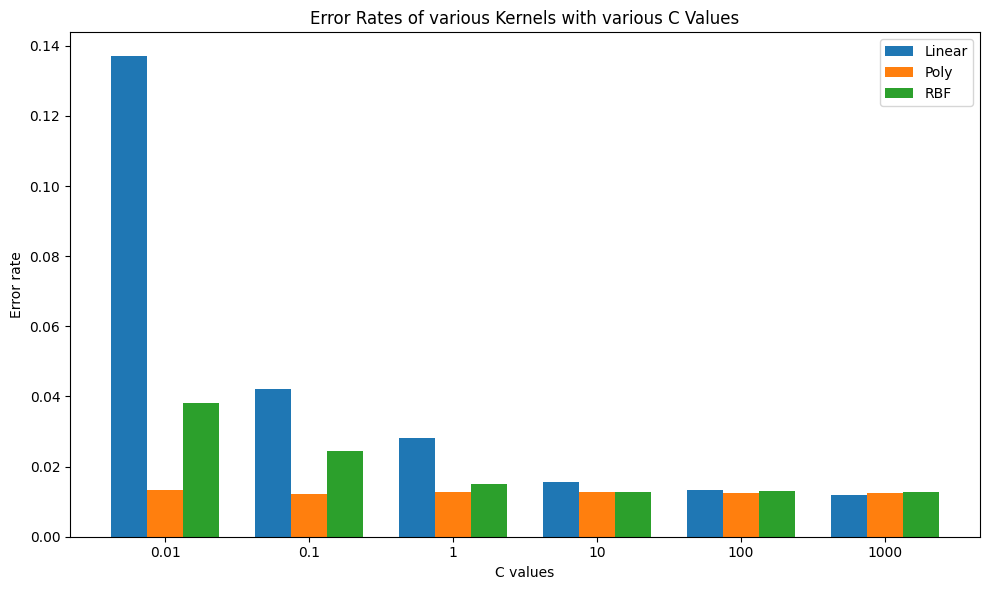

In [316]:
block_size = 0.25
index = range(len(assignment_chedham.C))

plt.figure(figsize=(10, 6))
print(complete_second_task.error)
plt.bar(index, complete_second_task.error[0], width=block_size, label='Linear')
plt.bar([i + block_size for i in index], complete_second_task.error[1], width=block_size, label='Poly')
plt.bar([i + 2 * block_size for i in index], complete_second_task.error[2], width=block_size, label='RBF')

plt.xlabel('C values')
plt.ylabel('Error rate')
plt.title('Error Rates of various Kernels with various C Values')
plt.xticks([i + block_size for i in index], assignment_chedham.C)
plt.legend()

plt.tight_layout()
plt.show()

In [317]:
1-0.012859496649572755

0.9871405033504272

Observations:

Even if the third order polynomial performs the best, its performance does not alter as I change the regularization parameter C. The SVM classifier with the third order polynomial appears to be independent of the regulation parameter.


As the magnitude of the regularization parameter grows, the SVM classifiers with rbf and linear kernels improve.



So, for an SVM classifier, I'd pick a kernel whose predictions can be changed and improved by adjusting the regularization value.



In this scenario, I'd go with rbf kernal.



And while selecting a regularization parameter, we must select a value that balances the accuracy and overfitting characteristics.



As a result, I'd go with 10 as the C.



For the svm classfier with rbf kernl with C=10 I'm getting accuracy 1-0.012859496649572755 = 0.9871405033504272




I choose svm classfier with rbf kernl with C=10 for which I'm getting accuracy 1-0.012859496649572755 = 0.9871405033504272


## HP

In [318]:
[row[4] for row in complete_second_task.error]

[0.013202255861226697, 0.012516737437918812, 0.013030435313017619]

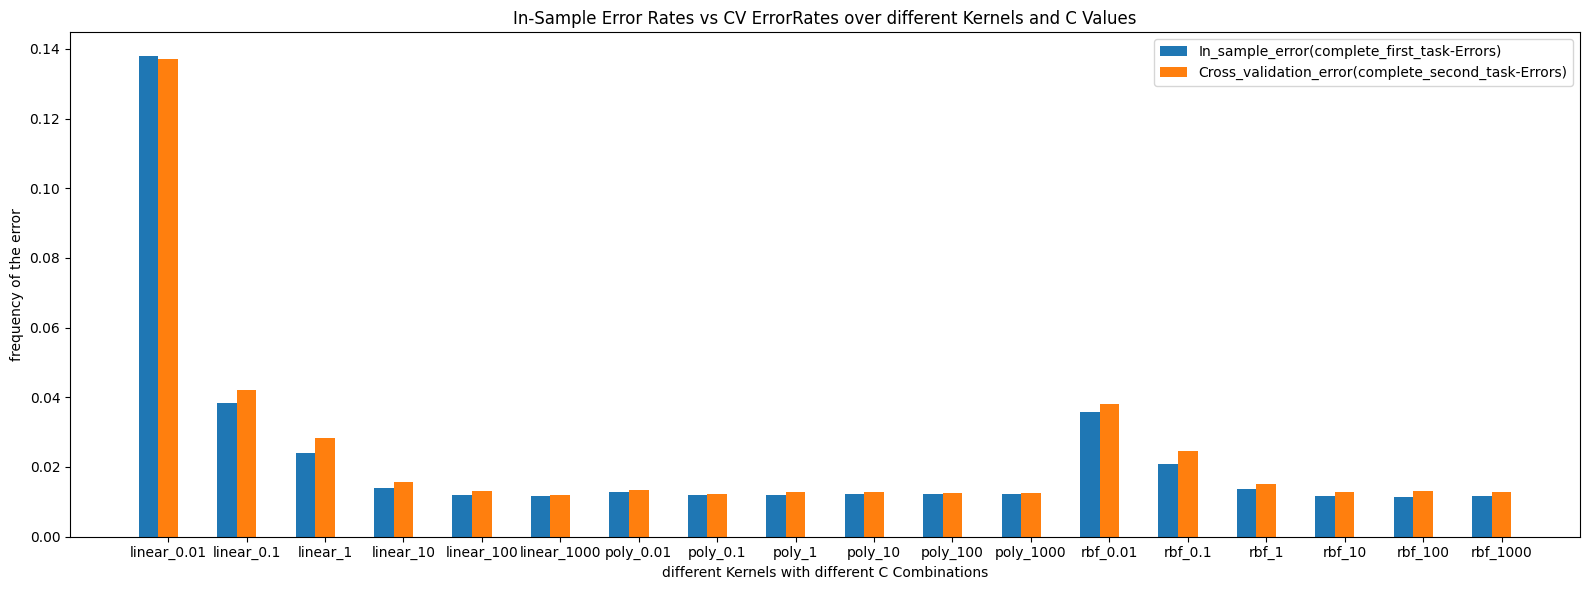

In [319]:
block_size = 0.25
reg_index = 4
index = range(len(assignment_chedham.kernels)*len(assignment_chedham.C))
x_ticks = []
in_sample_error = []
cv_error = []

for k_ind, kernel in enumerate(assignment_chedham.kernels):
  for c_ind, c in enumerate(assignment_chedham.C):
    x_ticks.append(f"{kernel}_{c}")
    in_sample_error.append(complete_first_task.error[k_ind][c_ind])
    cv_error.append(complete_second_task.error[k_ind][c_ind])

plt.figure(figsize=(16, 6))
plt.bar(index, in_sample_error, width=block_size, label='In_sample_error(complete_first_task-Errors)')
plt.bar([i + block_size for i in index], cv_error, width=block_size, label='Cross_validation_error(complete_second_task-Errors)')

plt.xlabel('different Kernels with different C Combinations')
plt.ylabel('frequency of the error')
plt.title('In-Sample Error Rates vs CV ErrorRates over different Kernels and C Values')
plt.xticks([i + block_size for i in index], x_ticks)
plt.legend()

plt.tight_layout()
plt.show()

Observations:

- As the normalization parameter is increased, the cv and e_in error decrease.



- In almost every case, the in-sample error is less than the cv_error error.



- I believe this is an indication of overfitting because we are receiving extremely little errors, which may not be the case when we feed unknown data to the model.



- Furthermore, there is no significant difference in error with any parameter C when using svm with poly kernel.



# Task-3

## LP-1

Final SVM:
  - Kernal : rbf
  - C : 10

In [320]:
support_vector = SVC(kernel='rbf', C=10)
support_vector.fit(assignment_chedham.X_train, assignment_chedham.Y_train)

preicted_y = support_vector.predict(assignment_chedham.X_train)

error_from_training = 1 - accuracy_score(assignment_chedham.Y_train, preicted_y)

print(f"In-sample error for the SVM rbf kernel and C=10 percentage is {error_from_training*100:.2f}")

In-sample error for the SVM rbf kernel and C=10 percentage is 1.17


## LP-2

####Questions?

What does this mean "Note that you do not need to filter this dataset, similar to the training set in this homework."

I think below are the things that we need to do on training dataset,

1. Since, the rows in dataset are space separated integers, we need to preprocess and make it right.
2. Like we filtered digits 1 and 5 in past assignments, we should not filter for any digits.
3. Instead make all non-1's to -1's in y lable.

Which of the above we should not apply for the test dataset?

Correct me if I understood something wrong.

#### Answer:

Understood, we are doing same pre-processing on test data like we did for the test data.



In [321]:
preicted_y = support_vector.predict(assignment_chedham.X_test)

test_error = 1 - accuracy_score(assignment_chedham.Y_test, preicted_y)

print(f"Final error for the SVM model with rbf kernel and C=10 {test_error*100:.2f}")

Final error for the SVM model with rbf kernel and C=10 1.60


# Task-4

## HP-1

In [322]:
models = ["PLA", "pocket", "O(x^3) pocket", "NN-SGD", "NN-MBGD", "NN-BGD"]
accuracy = [63.42, 66.94, 95.32, 96.69, 98.71, 99.06]
errors_on_the_test_data = [100-x for x in accuracy]
errors_on_the_test_data

[36.58,
 33.06,
 4.680000000000007,
 3.3100000000000023,
 1.2900000000000063,
 0.9399999999999977]

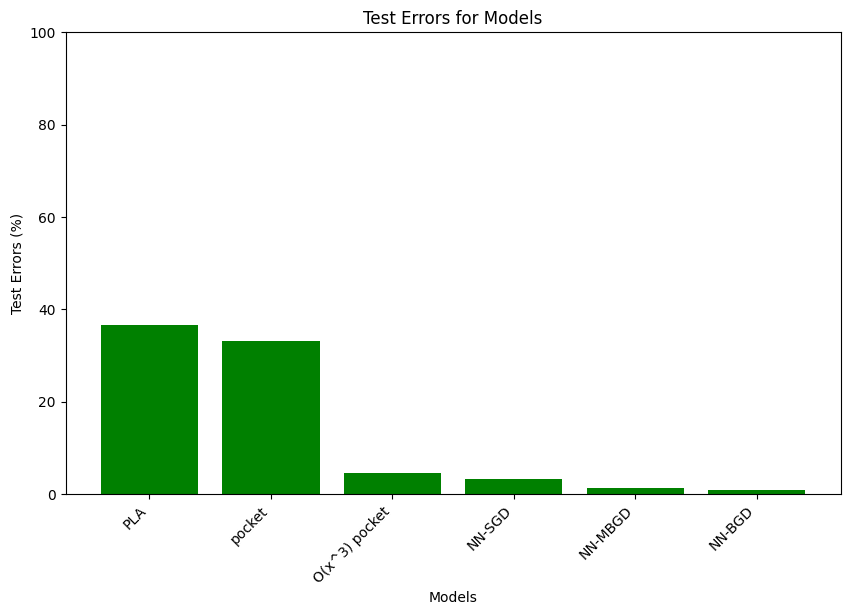

In [323]:
plt.figure(figsize=(10, 6))
plt.bar(models, errors_on_the_test_data, color='green')
plt.xlabel('Models')
plt.ylabel('Test Errors (%)')
plt.title('Test Errors for Models')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()

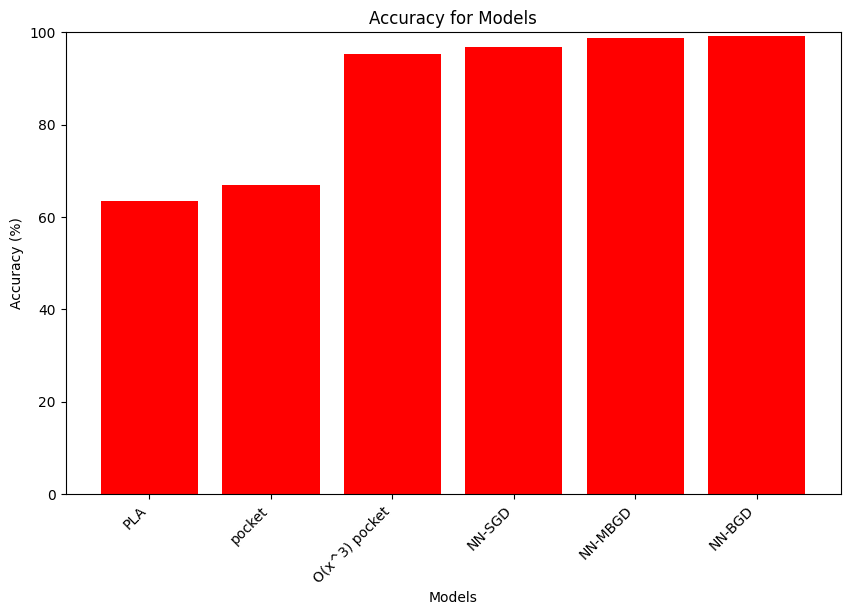

In [324]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Models')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()

Best Test Error: With a test error of 0.94%, the NN-BGD model has the lowest test error.

Worst Test Error: At 36.58%, the PLA model has the worst test error.



A variety of factors influence the performance of the models.



In the example of Pocket and PLA, which are very simple models with only two features and only evaluate linear relationships, increasing the features to eight by generating a 3rd order polynomial improved the performance by 33%.



When compared to the pocket and PLA algorithms, the polynomial feature transformation (O(x3) pocket) may have improved the model's ability to capture nonlinear relationships in the data.






- As the model's complexity increases, so do the predictions; for example, neural networks (NN-SGD, NN-MBGD, NN-BGD) may have learned more intricate patterns in the data, resulting in reduced errors as compared to simpler models like as PLA.

## HP-2

In [325]:
test_df.shape

(2006, 3)

In [326]:
train_df.shape

(7290, 3)

Yes, this is the correct strategy for determining the best digit classification model. Using a dataset of about 2000 samples for testing and 3700 samples for training, and taking into account the range of models employed, the strategy involved modifying a lot of things to optimize to get the best classification model.



Here are a few examples of what we did during the course to get the best categorization model.





Cross-validation: When fitting a pocket with 3rd order transformed data, we employed cross-validation and discovered that it helps us avoid overfitting. We used the same strategy in other locations as well.





We experimented with different learning rates, regularization strengths, and the number of epochs for neural networks. For non-linear models such as polynomial regression, multiple polynomial orders were investigated in order to balance model complexity and performance.

Model Complexity vs. Dataset Size: By comparing model complexity to dataset size. Because more complicated models may overfit smaller datasets, a trade-off between model complexity and dataset size must be assessed.



The following are a few steps we took to increase the performance of each model.



Pocket Algorithm and Perceptron (PLA):

- Increasing the number of weight updates improves accuracy to some amount, but it may eventually approach a plateau.




- Experimenting with higher-order polynomials aids in the representation of complex relationships. The improvement in performance achieved by changing the data into a third order polynomial demonstrates the importance of non-linear correlations in the data.

Neuronal Networks (SGD, MBGD, and BGD):

- Modified the learning rate to improve convergence speed and avoid overshooting. This was most likely tweaked while experimenting with various gradient descent algorithms.

- Experimenting with different batch sizes for MBGD helped balance computation efficiency and convergence speed.

- Experimented with various weight initialization approaches to see how they affected convergence speed and avoided local minima.




My final response is that we tried systematic approaches in an orderly manner while enhancing the performance of each model by experimenting with various methods such as increasing iterations, epochs, changing learning or hyperparameters. As a result, our strategy is an excellent way to handle this particular challenge.